<a href="https://colab.research.google.com/github/google/cluster-data/blob/master/clusterdata_analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google and Alibaba trace analysis

## Google Trace 2011:
1. https://github.com/google/cluster-data
2. https://github.com/google/cluster-data/blob/master/TraceVersion1.md
3. Trace Blog: https://ai.googleblog.com/2010/01/google-cluster-data.html?m=1

## Alibaba Trace 2017:
1. https://github.com/alibaba/clusterdata/blob/master/cluster-trace-v2017/trace_201708.md
2. https://github.com/alibaba/clusterdata/blob/master/cluster-trace-v2017/README2017.md

## HPC Production Trace - Zenodo
1. https://zenodo.org/record/3872169#.ZDOhXi-B1QJ
2. https://dl.acm.org/doi/pdf/10.1145/3472883.3487007

In [2]:
import pandas as pd
import numpy as np
import csv

with open("./google-cluster-data-1.csv", 'r') as file:
    csvreader = csv.reader(file)
    count = 0
    for row in csvreader:
        count += 1
print("Number of rows: ", count)

Number of rows:  3535030


In [23]:
# read with delimilter, otherwise reads as one column
df = pd.read_csv("./google-cluster-data-1.csv", delimiter=" ")
print(df.head)
print(df.columns)

<bound method NDFrame.head of            Time    ParentID      TaskID  JobType  NrmlTaskCores  NrmlTaskMem  \
0         90000   757745334  1488529826        0       0.000000     0.031130   
1         90000   975992247  1488529821        0       0.000000     0.000000   
2         90000  1468458091  1488529832        1       0.021875     0.002353   
3         90000  1460281235  1488529840        0       0.000000     0.000000   
4         90000  1164728954  1488529835        0       0.003125     0.001638   
...         ...         ...         ...      ...            ...          ...   
3535024  112500  1487094655  1487103476        0       0.000000     0.000879   
3535025  112500  1461321601  1465612301        0       0.000000     0.000879   
3535026  112500  1487094655  1487097223        0       0.000000     0.000879   
3535027  112500   618817162  1485932004        1       0.000000     0.000879   
3535028  112500  1213243701  1349431592        0       0.000000     0.000879   

         

In [47]:
print(df.head(2).iloc[:, 0:6])
print("Number of columns:", len(df.columns))
print("Time range:", df['Time'].min(), df['Time'].max(), df['Time'].max() - df['Time'].min())
print("Number of unique Task IDs:", df['TaskID'].nunique())

    Time   ParentID      TaskID  JobType  NrmlTaskCores  NrmlTaskMem
0  90000  757745334  1488529826        0            0.0      0.03113
1  90000  975992247  1488529821        0            0.0      0.00000
Number of columns: 7
Time range: 90000 112500 22500
Number of unique Task IDs: 176580


In [ ]:
dfnew = pd.DataFrame(columns = ['TaskID', 'RunTime'])
for i in df['TaskID'].unique()[0:176580]:
    #dfnew.append({'TaskID' : i, 'RunTime' : df[df['TaskID'] == i].shape[0]}, ignore_index = True)
    #dfnew.concat(pd.concat([i, df[df['TaskID'] == i].shape[0]]), axis=1)
    #print(i, df[df['TaskID'] == i].shape[0])
    dfnew.loc[-1] = [i, df[df['TaskID'] == i].shape[0]*5]
    dfnew.index = dfnew.index + 1
    dfnew = dfnew.sort_index()
print(dfnew.head)

.apply


array([[<AxesSubplot:title={'center':'RunTime'}>]], dtype=object)

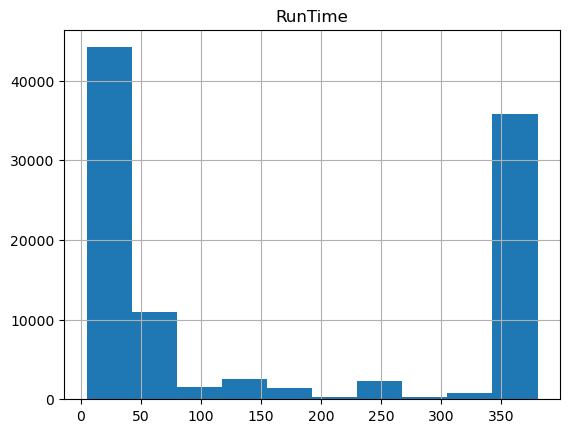

In [56]:
dfnew.hist(column='RunTime')

# Alibaba Traces



In [57]:
alibaba = pd.read_csv("./alibaba-trace-2017/batch_task.csv")
print(alibaba.head(10))

    6459   6524   3   4  15740  Terminated    50  0.007956928014909534
0   6457   6533   3   5      1  Terminated  50.0              0.004395
1   6036   6046   4   7    393     Waiting   NaN                   NaN
2   6036   6046   4   6    452     Waiting   NaN                   NaN
3  10719  11332  15  67   1705  Terminated  50.0              0.005736
4  10718  11164  15  66    631  Terminated  50.0              0.016007
5  10718  10916  15  65    300  Terminated  50.0              0.018658
6  10718  12897  15  64   2003  Terminated  50.0              0.016007
7  11792  11999  18  88    257  Terminated  50.0              0.013356
8  11792  14331  18  82   1559  Terminated  50.0              0.016007
9  11792  12112  18  91    321  Terminated  50.0              0.013356


In [62]:
colNames = ['start_timestamp', 'end_timestamp', 'job_id', 'task_id', 'machineID', 'status', 'seq_no', 'total_seq_no', 'real_cpu_max', 'real_cpu_avg', 'real_mem_max', 'real_mem_avg']
alibaba = pd.read_csv("./alibaba-trace-2017/batch_instance.csv", names=colNames, header=None)
print(alibaba.head(10))
print(alibaba.columns)

   start_timestamp  end_timestamp  job_id  task_id  machineID      status  \
0            41562          41618   120.0    686.0      299.0  Terminated   
1            41561          41619   120.0    686.0     1279.0  Terminated   
2            41562          41617   120.0    686.0      828.0  Terminated   
3            41561          41617   120.0    686.0       95.0  Terminated   
4            41557          41610   120.0    686.0      545.0  Terminated   
5            41557          41614   120.0    686.0      258.0  Terminated   
6            41558          41614   120.0    686.0      495.0  Terminated   
7            41560          41619   120.0    686.0      831.0  Terminated   
8            41561          41616   120.0    686.0     1169.0  Terminated   
9            41561          41616   120.0    686.0      678.0  Terminated   

   seq_no  total_seq_no  real_cpu_max  real_cpu_avg  real_mem_max  \
0       1             1          1.50          0.29           NaN   
1       1     

In [70]:
print("Number of unique Job IDs:", alibaba['job_id'].nunique())

Number of unique Job IDs: 12951


In [71]:
alibabaNew = pd.DataFrame(columns = ['JobID', 'RunTime'])
for i in alibaba['job_id'].unique()[0:10000]:
    alibabaNew.loc[-1] = [i, alibaba[alibaba['job_id'] == i].shape[0]]
    alibabaNew.index = alibabaNew.index + 1
    alibabaNew = alibabaNew.sort_index()
    
print(alibabaNew.head)

<bound method NDFrame.head of         JobID  RunTime
0     11662.0      1.0
1     11330.0    145.0
2      9524.0    842.0
3      8664.0      2.0
4      7950.0    578.0
...       ...      ...
9995   1827.0     66.0
9996    759.0     94.0
9997    239.0     80.0
9998      NaN      0.0
9999    120.0   4211.0

[10000 rows x 2 columns]>


<bound method NDFrame.head of         JobID  RunTime
0     11662.0      1.0
1     11330.0    145.0
2      9524.0    842.0
3      8664.0      2.0
4      7950.0    578.0
...       ...      ...
9994   3923.0    566.0
9995   1827.0     66.0
9996    759.0     94.0
9997    239.0     80.0
9999    120.0   4211.0

[9999 rows x 2 columns]>


array([[<AxesSubplot:title={'center':'RunTime'}>]], dtype=object)

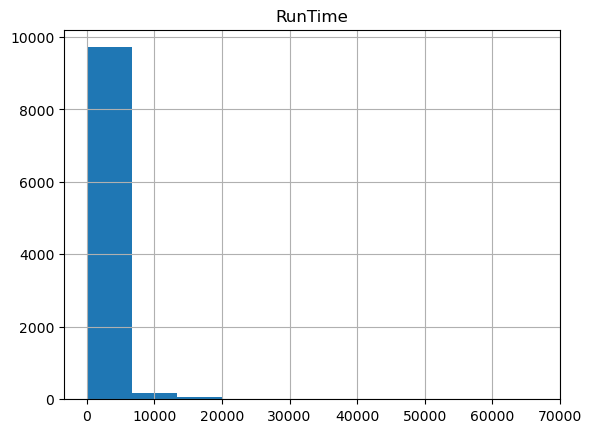

In [72]:
alibabaNew = alibabaNew.dropna()
print(alibabaNew.head)
alibabaNew.hist('RunTime')

array([[<AxesSubplot:title={'center':'RunTime'}>]], dtype=object)

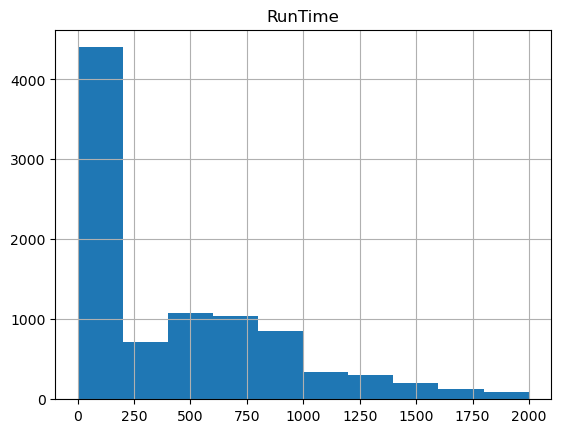

In [75]:
alibabanew = alibabaNew[alibabaNew['RunTime'] < 2000]
alibabanew.hist('RunTime')

# Zenodo Trace

In [1]:
import h5py

In [8]:
filename = "zenodo-trace/traces-2016.h5"

with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    print(type(f[a_group_key])) 
    data = list(f[a_group_key])
    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    #ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['stage']>
<class 'h5py._hl.group.Group'>


In [14]:
#Checkout what keys are inside that group.
print(data)
#for key in a_group_key.keys():
#    print(key)

['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values', 'block2_items', 'block2_values', 'block3_items', 'block3_values']


In [19]:
for key in data.keys():
    print(key)

AttributeError: 'list' object has no attribute 'keys'

In [22]:
keys = []
with h5py.File(filename, 'r') as f: # open file
    f.visit(keys.append)
print(keys)

['stage', 'stage/axis0', 'stage/axis1', 'stage/block0_items', 'stage/block0_values', 'stage/block1_items', 'stage/block1_values', 'stage/block2_items', 'stage/block2_values', 'stage/block3_items', 'stage/block3_values']
